# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm
from datetime import datetime
import time
import gmaps


# Import API key
from api_keys import *

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Configure Google Maps
gmaps.configure(api_key=gkey)

# Output File (CSV)
output_data_file = "output/city_data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
settings = {"APPID": ow_api_key, "units": "imperial"}
processed_lat = []
processed_lon = []
processed_city = []
date = []
country = []
cloudiness = []
humidity = []
maxtemp = []
windspeed = []
for num, city in enumerate(cities):
    print(f'Processing record {num} - {city}')
    try:
        data = owm.get_current(city, **settings)
        
        processed_lat.append(data['coord']['lat'])
        processed_lon.append(data['coord']['lon'])
        processed_city.append(data['name'])
        country.append(data['sys']['country'])
        date.append(data['dt'])
        cloudiness.append(data['clouds']['all'])
        humidity.append(data['main']['humidity'])
        maxtemp.append(data['main']['temp_max'])
        windspeed.append(data['wind']['speed'])
        time.sleep(2)
        
    except Exception as e:
        print(f'City-{city} not found... skipping')
        

Processing record 0 - sosnogorsk
Processing record 1 - charagua
Processing record 2 - prince rupert
Processing record 3 - hilo
Processing record 4 - qaanaaq
Processing record 5 - seminole
Processing record 6 - oranjemund
Processing record 7 - kahului
Processing record 8 - bambous virieux
Processing record 9 - leningradskiy
Processing record 10 - sentyabrskiy
City-sentyabrskiy not found... skipping
Processing record 11 - east london
Processing record 12 - grand river south east
City-grand river south east not found... skipping
Processing record 13 - svetlyy
City-svetlyy not found... skipping
Processing record 14 - xiongshi
City-xiongshi not found... skipping
Processing record 15 - hamilton
Processing record 16 - hailar
Processing record 17 - zhigansk
Processing record 18 - new norfolk
Processing record 19 - meadow lake
Processing record 20 - norman wells
Processing record 21 - punta arenas
Processing record 22 - ushuaia
Processing record 23 - jamestown
Processing record 24 - vila velha


Processing record 222 - buchanan
Processing record 223 - sokolo
Processing record 224 - cidreira
Processing record 225 - beloha
Processing record 226 - marcona
City-marcona not found... skipping
Processing record 227 - najran
Processing record 228 - muros
Processing record 229 - barawe
City-barawe not found... skipping
Processing record 230 - vostok
Processing record 231 - khuzhir
Processing record 232 - quatre cocos
Processing record 233 - salalah
Processing record 234 - bonthe
Processing record 235 - lalomanu
City-lalomanu not found... skipping
Processing record 236 - alfenas
Processing record 237 - khatanga
Processing record 238 - barinitas
Processing record 239 - ozerne
Processing record 240 - asyut
Processing record 241 - yazman
Processing record 242 - torbay
Processing record 243 - byron bay
Processing record 244 - aswan
Processing record 245 - taormina
Processing record 246 - komsomolskiy
Processing record 247 - wanlaweyn
Processing record 248 - varberg
Processing record 249 - d

Processing record 444 - borama
City-borama not found... skipping
Processing record 445 - riihimaki
Processing record 446 - adrar
Processing record 447 - liverpool
Processing record 448 - usinsk
Processing record 449 - estevan
Processing record 450 - jermuk
Processing record 451 - bend
Processing record 452 - krasnyy chikoy
Processing record 453 - uige
Processing record 454 - tokur
Processing record 455 - roma
Processing record 456 - ordynskoye
Processing record 457 - vega de alatorre
Processing record 458 - las choapas
Processing record 459 - faya
Processing record 460 - half moon bay
Processing record 461 - rungata
City-rungata not found... skipping
Processing record 462 - tomatlan
Processing record 463 - maragogi
Processing record 464 - kamenskoye
City-kamenskoye not found... skipping
Processing record 465 - hudiksvall
Processing record 466 - dukat
Processing record 467 - bilara
Processing record 468 - mweka
Processing record 469 - padang
Processing record 470 - rio do sul
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
data_for_df = {
   "City": processed_city,
   "Cloudiness": cloudiness,
   "Country": country,
   "Date": date,
   "Humidity": humidity,
   "Lat": processed_lat,
   "Lng": processed_lon,
   "Max Temp": maxtemp,
   "Wind Speed": windspeed
}

city_data_df = pd.DataFrame(data_for_df)
city_data_df.to_csv(output_data_file, index=False)
city_data_df.count()

City          544
Cloudiness    544
Country       544
Date          544
Humidity      544
Lat           544
Lng           544
Max Temp      544
Wind Speed    544
dtype: int64

In [5]:
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Sosnogorsk,20,RU,1546783138,56,63.59,53.93,-11.71,5.93
1,Charagua,40,BO,1546779600,78,-19.79,-63.20,78.80,6.93
2,Prince Rupert,90,CA,1546779600,80,54.32,-130.32,35.60,16.11
3,Hilo,75,US,1546779180,78,19.71,-155.08,66.02,5.82
4,Qaanaaq,0,GL,1546783068,81,77.48,-69.36,-13.33,6.93


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

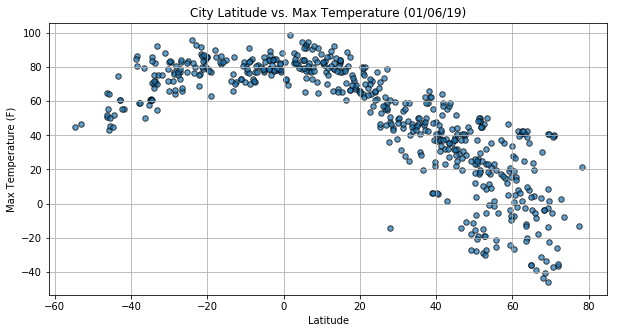

In [6]:
date_str = datetime.now().strftime('%m/%d/%y')

city_data_df = pd.read_csv(output_data_file)

city_data_df.plot(kind='scatter', x='Lat', y='Max Temp', s=30, grid=True,
                  marker='o', figsize=(10,5), linewidths=1, facecolors='blue', edgecolors='black', alpha=.7)

plt.title(f'City Latitude vs. Max Temperature ({date_str})')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.savefig('output/lat-temp.png')
plt.show()

#### Latitude vs. Humidity Plot

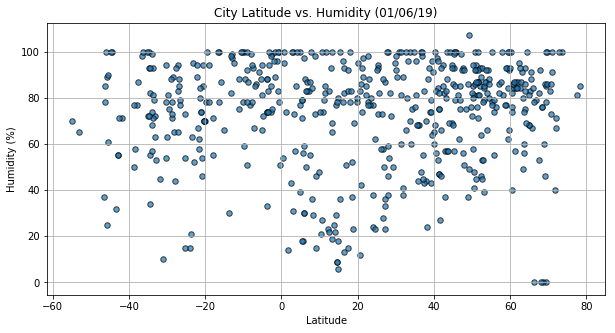

In [7]:
city_data_df.plot(kind='scatter', x='Lat', y='Humidity', s=30, grid=True,
                  marker='o', figsize=(10,5), linewidths=1, facecolors='blue', edgecolors='black', alpha=.7)

plt.title(f'City Latitude vs. Humidity ({date_str})')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.savefig('output/lat-humidity.png')
plt.show()

#### Latitude vs. Cloudiness Plot

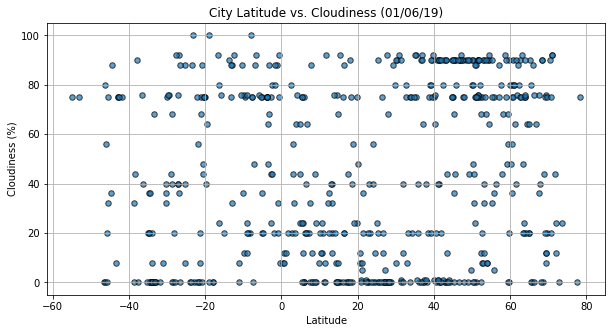

In [8]:
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness', s=30, grid=True,
                  marker='o', figsize=(10,5), linewidths=1, facecolors='blue', edgecolors='black', alpha=.7)

plt.title(f'City Latitude vs. Cloudiness ({date_str})')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.savefig('output/lat-cloudiness.png')
plt.show()

#### Latitude vs. Wind Speed Plot

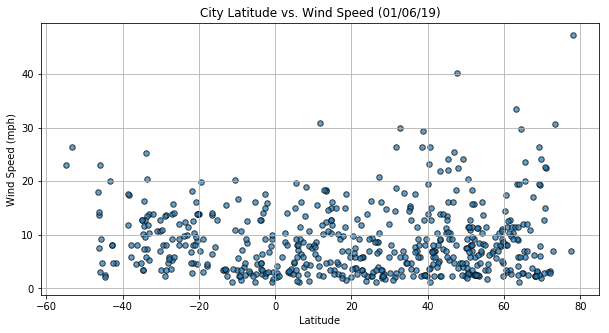

In [9]:
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed', s=30, grid=True,
                  marker='o', figsize=(10,5), linewidths=1, facecolors='blue', edgecolors='black', alpha=.7)

plt.title(f'City Latitude vs. Wind Speed ({date_str})')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.savefig('output/lat-windspeed.png')
plt.show()

In [22]:
# Plot Heatmap
fahr_to_kelvin = lambda f: (f - 32) * 5/9 + 273.15

# Convert temperatures to a positive scale
temps_for_map = fahr_to_kelvin(city_data_df['Max Temp'])
# Treat 65 F as pleasant temperature, for visualization
sixtyfive_in_kelvin = fahr_to_kelvin(65)
temps_for_map = temps_for_map/sixtyfive_in_kelvin

layout={ 'width': '800px', 'height': '400px' }

fig = gmaps.figure(center=(0,0), zoom_level=1.3, layout=layout)
heatmap_layer = gmaps.heatmap_layer(
    city_data_df[['Lat', 'Lng']], weights=temps_for_map, dissipating=False, max_intensity=2, point_radius=3.0)
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='400px', width='800px'))

# Observations

- Cities around equator seem to be experiencing warmer temperatures
- Cities in southern hemisphere, away from equator, are also warmer as the timeframe coincides with summer, which began around Dec 1
- Cities in northern hemisphere, away from equator, are colder due to winter, which began around Dec 1.
- Latitude does not seem to have any impact on Cloudiness and Humidity
- Windspeed does seem to be impacted by latitude for most of the cities. Cities farther away from equator show higher wind speeds.
